# Assignment 1 - Matrix-matrix multiplication
In this assignment, we will look at computing the product AB
 of two matrices A,B∈Rn×n
. The following code snippet defines a function that computes the product of two matrices. For example, the product of two 10 by 10 matrices is printed. The final line prints matrix1 @ matrix2 - the @ symbol denotes matrix multiplication, and Python will get Numpy to compute the product of two matrices. By looking at the output, it’s possible to check that the two results are identical.

## Part 1: a better function
Write your own function called faster_matrix_product that computes the product of two matrices more efficiently than slow_matrix_product. Your function may use functions from Numpy (eg np.dot or @) to complete part of its calculation, but your function should not use np.dot or @ to compute the full matrix-matrix product.

Before you look at the performance of your function, you should check that it is computing the correct results. Write a Python script using an assert statement that checks that your function gives the same result as using @ for random 2 by 2, 3 by 3, 4 by 4, and 5 by 5 matrices.

In a text box, give two brief reasons (1-2 sentences for each) why your function is better than slow_matrix_product. At least one of your reasons should be related to the time you expect the two functions to take.

Next, we want to compare the speed of slow_matrix_product and faster_matrix_product. Write a Python script that runs the two functions for matrices of a range of sizes, and use matplotlib to create a plot showing the time taken for different-sized matrices for both functions. You should be able to run the functions for matrices of size up to around 1000 by 1000 (but if you’re using an older/slower computer, you may decide to decrease the maximums slightly). You do not need to run your functions for every size between your minimum and maximum but should choose a set of 10-15 values that will give you an informative plot.

# Part 1

In [75]:
import numpy as np


def slow_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = 0
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    return np.array(result).transpose()


matrix1 = np.random.rand(10, 10)
matrix2 = np.random.rand(10, 10)

# print(slow_matrix_product(matrix1, matrix2))
# print(matrix1 @ matrix2)

[[1.9550986  2.1634619  2.86134838 2.5578827  1.87825008 2.34789771
  2.5281013  1.26892003 2.62852374 1.7860127 ]
 [1.81603618 2.29563733 2.03015235 3.14152315 1.86098765 1.88884995
  2.8044599  1.29204791 2.81011383 1.68991501]
 [2.84433627 2.33881755 3.0262855  3.64198658 2.27788545 2.75067267
  2.94603405 1.5087818  3.34390356 2.28729212]
 [2.46895942 2.54266022 3.05372236 3.93144991 2.30826067 2.92151761
  3.6168686  1.38551398 3.55204298 2.02831479]
 [1.68696683 1.49998457 1.86512686 2.13253561 1.50422102 1.62788033
  1.81133005 1.111907   2.06737387 1.48273091]
 [3.02291732 2.74757028 3.44245862 3.96104262 2.19729697 3.20843458
  3.51504353 2.02173589 3.27340737 2.63900937]
 [2.91648241 2.78341532 3.71677123 4.04153325 2.85184901 3.00810874
  3.39457823 1.86961065 3.71868428 2.46577284]
 [2.86215691 2.81066455 3.49496512 3.95726117 2.11929226 3.09114643
  3.2968248  1.90661247 3.08117297 2.51792244]
 [2.22078668 1.97004094 2.43804484 2.91944226 1.45506839 2.59172255
  2.74816136

In [ ]:
import numpy as np
## 1. Write your own function called faster_matrix_product that computes the product of two matrices more efficiently
## than slow_matrix_product. Your function may use functions from Numpy (eg np.dot or @)
## to complete part of its calculation, but your function should not use np.dot or @ to compute the full matrix-matrix product.


def faster_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = np.zeros((mat1.shape[0], mat2.shape[1]))
    for r in range(mat1.shape[0]):
        for c in range(mat2.shape[1]):
            value = np.sum(mat1[r, :] * mat2[:, c])
            result[r, c] = value
    return result


matrix1 = np.random.rand(10, 10)
matrix2 = np.random.rand(10, 10)

print(faster_matrix_product(matrix1, matrix2))
print(matrix1 @ matrix2)

## 2. Before you look at the performance of your function, you should check that it is computing the correct results.
## Write a Python script using an assert statement that checks that your function gives the same result
## as using @ for random 2 by 2, 3 by 3, 4 by 4, and 5 by 5 matrices.

matrix3 = np.random.rand(2, 2)
matrix4 = np.random.rand(2, 2)

matrix5 = np.random.rand(3, 3)
matrix6 = np.random.rand(3, 3)

matrix7 = np.random.rand(4, 4)
matrix8 = np.random.rand(4, 4)

matrix9 = np.random.rand(5, 5)
matrix10 = np.random.rand(5, 5)

assert np.allclose(faster_matrix_product(matrix1, matrix2), matrix1 @ matrix2)
assert np.allclose(faster_matrix_product(matrix3, matrix4), matrix3 @ matrix4)
assert np.allclose(faster_matrix_product(matrix5, matrix6), matrix5 @ matrix6)
assert np.allclose(faster_matrix_product(matrix7, matrix8), matrix7 @ matrix8)
assert np.allclose(faster_matrix_product(matrix9, matrix10), matrix9 @ matrix10)


[[1.85045992 1.03927172 1.89914433 1.44135273 2.35597801 1.80136837
  2.44862702 2.65292791 2.71442887 1.54246116]
 [1.70491315 1.51454184 1.10153672 1.4825739  1.78346774 1.26808806
  1.67020795 2.55703209 2.40143973 1.63260454]
 [2.14245728 1.70797266 1.84873805 2.16631584 2.26102752 1.75256137
  2.56454649 3.2860003  3.47406956 2.42158534]
 [2.72599416 1.70164315 2.11983745 2.18845492 2.7094274  1.83120283
  3.05103955 3.5309083  3.65238124 2.18039439]
 [1.79880127 1.83001402 1.87549839 1.89883253 2.14441805 2.00725456
  2.10929711 3.3435382  2.90249724 2.2321413 ]
 [2.17930586 2.12706633 1.66071738 2.03207098 2.39914751 2.18335883
  2.58618285 3.86721801 3.75941201 2.62466328]
 [3.08573255 2.1759701  2.35895849 2.40869435 3.08956467 2.28165415
  3.40971752 4.31196499 4.21984731 2.75848566]
 [1.29844888 1.52939503 1.78295526 1.94984876 1.92691981 1.71199121
  2.10299601 2.64891562 3.08679009 1.89312782]
 [1.83640598 1.42634768 1.59343136 2.17833718 1.99000069 2.00387597
  1.92834044

## First Part Answers

### 1. (Slow_matrix_product) uses 3 different loops to produce the result of the product of two matrices and uses more steps to store and then transpose the result. On the other hand, (faster_matrix_product) only uses two loops and fewer steps to store the result without transposing them. Furthermore, the slow function doesn't utilize the use of the numpy library to optimize the result, while the fast function uses numpay.sum in order to enhance the performance of the calculation, as this type of sum works best with numpy metrics and huge datasets. 

### 2. The way the faster function works will definitely accelerate the performance, thus, I predict that the faster function will take less time to produce the results compared to the slower function. 

In [ ]:
## Next, we want to compare the speed of slow_matrix_product and faster_matrix_product.
## Write a Python script that runs the two functions for matrices of a range of sizes,
## and use matplotlib to create a plot showing the time taken for different-sized matrices for both functions.
## You should be able to run the functions for matrices of size up to around 1000 by 1000 (but if you’re using an older/slower computer,
## you may decide to decrease the maximums slightly). You do not need to run your functions for every size between your minimum and maximum but
## should choose a set of 10-15 values that will give you an informative plot

matrix_size = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

slow_times = []
fast_times = []

for n in matrix_size:
    test_mat1 = np.random.rand(n, n)
    test_mat2 = np.random.rand(n, n)

    t_slow = %timeit -n 1 -r 1 -o -q slow_matrix_product(test_mat1, test_mat2)
    t_fast = %timeit -n 1 -r 1 -o -q faster_matrix_product(test_mat1, test_mat2)

    slow_times.append(t_slow.average)
    fast_times.append(t_fast.average)

    print(f"[Slow] [N={n}] Average Run Time: {t_slow.average}s")
    print(f"[Fast] [N={n}] Average Run Time: {t_fast.average}s")


[Slow] [N=100] Average Run Time: 0.31163009999727365s
[Fast] [N=100] Average Run Time: 0.03900610000710003s
[Slow] [N=200] Average Run Time: 2.366650399999344s
[Fast] [N=200] Average Run Time: 0.15446499999961816s
[Slow] [N=300] Average Run Time: 8.07343160000164s
[Fast] [N=300] Average Run Time: 0.3536284000001615s
[Slow] [N=400] Average Run Time: 20.554161300009582s
[Fast] [N=400] Average Run Time: 0.6465513000002829s
[Slow] [N=500] Average Run Time: 38.91277710000577s
[Fast] [N=500] Average Run Time: 1.023220200004289s
[Slow] [N=600] Average Run Time: 68.10087029999704s
[Fast] [N=600] Average Run Time: 1.7595575000013923s
[Slow] [N=700] Average Run Time: 109.78059829999984s
[Fast] [N=700] Average Run Time: 2.399115200008964s
[Slow] [N=800] Average Run Time: 159.287161500004s
[Fast] [N=800] Average Run Time: 3.3306556999887107s
[Slow] [N=900] Average Run Time: 231.40447069999937s
[Fast] [N=900] Average Run Time: 3.984933700005058s
[Slow] [N=1000] Average Run Time: 325.2486413000006s


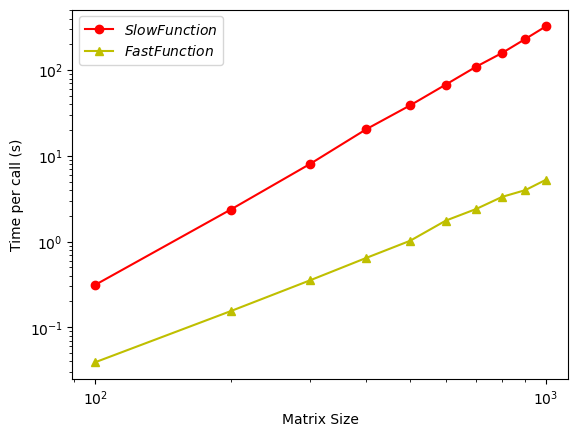

In [77]:
import matplotlib.pylab as plt

plt.plot(matrix_size, slow_times, "ro-")
plt.plot(matrix_size, fast_times, "y^-")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Matrix Size")
plt.ylabel("Time per call (s)")
plt.legend(["$Slow Function$", "$Fast Function$"])

## Part 2: speeding it up with Numba
In the second part of this assignment, you’re going to use Numba to speed up your function.

Create a copy of your function faster_matrix_product that is just-in-time (JIT) compiled using Numba. To demonstrate the speed improvement acheived by using Numba, make a plot (similar to that you made in the first part) that shows the times taken to multiply matrices using faster_matrix_product, faster_matrix_product with Numba JIT compilation and Numpy (@). Numpy’s matrix-matrix multiplication is highly optimised, so you should not expect to be as fast is it.

You may further speed up your function by adjusting the memory layout used. The function np.asfortanarray will make a copy of an array that uses Fortran-style ordering, for example:

In [ ]:
import numpy as np

a = np.random.rand(10, 10)
fortran_a = np.asfortranarray(a)

Make a plot that compares the times taken by your JIT compiled function when the inputs have different combinations of C-style and Fortran-style ordering (ie the plot should have lines for when both inputs are C-style, when the first is C-style and the second is Fortran-style, and so on). Focusing on the fact that it is more efficient to access memory that is close to previous accesses, comment (in 1-2 sentences) on why one of these orderings appears to be fastest that the others. (Numba can do a lot of different things when compiling code, so depending on your function there may or may not be a large difference: if there is little change in speeds for your function, you can comment on which ordering you might expect to be faster and why, but conclude that Numba is doing something more advanced.)

# Part 2

In [ ]:
from numba import njit, jit


@jit
def faster_matrix_product_numba(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = np.zeros((mat1.shape[0], mat2.shape[1]))
    for r in range(mat1.shape[0]):
        for c in range(mat2.shape[1]):
            value = np.sum(mat1[r, :] * mat2[:, c])
            result[r, c] = value
    return result


matrix1 = np.random.rand(10, 10)
matrix2 = np.random.rand(10, 10)


In [ ]:
matrix_size = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

fast_times = []
fastNumba_times = []
Numpy_times = []

for n in matrix_size:
    test_mat1 = np.random.rand(n, n)
    test_mat2 = np.random.rand(n, n)

    t_fastNumba = %timeit -n 1 -r 1 -o -q faster_matrix_product_numba(test_mat1, test_mat2)
    t_fasta = %timeit -n 1 -r 1 -o -q faster_matrix_product(test_mat1, test_mat2)
    t_numpy = %timeit -n 1 -r 1 -o -q (test_mat1@test_mat2)

    fastNumba_times.append(t_fastNumba.average)
    fast_times.append(t_fast.average)
    Numpy_times.append(t_numpy.average)

    print(f"[Fast with Numba] [N={n}] Average Run Time: {t_fastNumba.average}s")
    print(f"[Fast] [N={n}] Average Run Time: {t_fast.average}s")
    print(f"[Numpy] [N={n}] Average Run Time: {t_numpy.average}s")


[Fast with Numba] [N=100] Average Run Time: 0.2572436999762431s
[Fast] [N=100] Average Run Time: 1.6394924571463239s
[Numpy] [N=100] Average Run Time: 0.027479799988213927s
[Fast with Numba] [N=200] Average Run Time: 0.013162399991415441s
[Fast] [N=200] Average Run Time: 1.6394924571463239s
[Numpy] [N=200] Average Run Time: 0.0007128999859560281s
[Fast with Numba] [N=300] Average Run Time: 0.03854810001212172s
[Fast] [N=300] Average Run Time: 1.6394924571463239s
[Numpy] [N=300] Average Run Time: 0.0011971000058110803s
[Fast with Numba] [N=400] Average Run Time: 0.10471519999555312s
[Fast] [N=400] Average Run Time: 1.6394924571463239s
[Numpy] [N=400] Average Run Time: 0.002498999994713813s
[Fast with Numba] [N=500] Average Run Time: 0.4367703000025358s
[Fast] [N=500] Average Run Time: 1.6394924571463239s
[Numpy] [N=500] Average Run Time: 0.00386989998514764s
[Fast with Numba] [N=600] Average Run Time: 0.3043716000101995s
[Fast] [N=600] Average Run Time: 1.6394924571463239s
[Numpy] [N=60

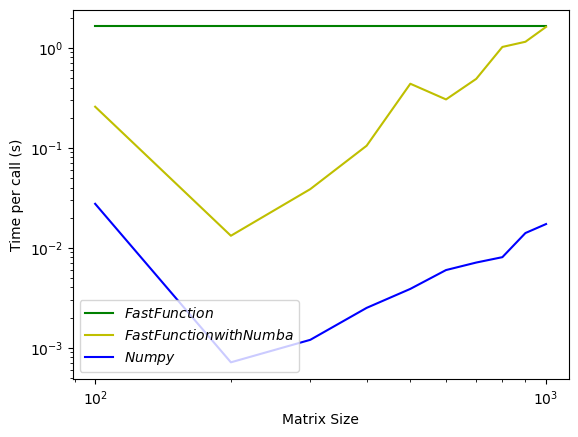

In [ ]:
import matplotlib.pylab as plt

plt.plot(matrix_size, fast_times, "g-")
plt.plot(matrix_size, fastNumba_times, "y-")
plt.plot(matrix_size, Numpy_times, "b-")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Matrix Size")
plt.ylabel("Time per call (s)")
plt.legend(["$Fast Function$", "$Fast Function with Numba$", "$Numpy$"])

In [ ]:
import numpy as np
from numba import njit, jit

matrix_size = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


Fortran_times = []
Cstyle_times = []
FandC_times = []
CandF_times = []


for n in matrix_size:
    test_mat1 = np.random.rand(n, n)
    test_mat2 = np.random.rand(n, n)
    fortran_mat1 = np.asfortranarray(test_mat1)
    fortran_mat2 = np.asfortranarray(test_mat2)

    t_NumbaFortran = %timeit -n 1 -r 1 -o -q faster_matrix_product_numba(fortran_mat1, fortran_mat2)
    t_Cstyle = %timeit -n 1 -r 1 -o -q faster_matrix_product_numba(test_mat1, test_mat2)
    t_FnadC = %timeit -n 1 -r 1 -o -q faster_matrix_product_numba(fortran_mat1, test_mat2)
    t_CandF = %timeit -n 1 -r 1 -o -q faster_matrix_product_numba(test_mat1, fortran_mat2)

    Fortran_times.append(t_NumbaFortran.average)
    Cstyle_times.append(t_Cstyle.average)
    FandC_times.append(t_FnadC.average)
    CandF_times.append(t_CandF.average)

    print(f"[Numba Fortran] [N={n}] Average Run Time: {t_NumbaFortran.average}s")
    print(f"[Numba C-Style] [N={n}] Average Run Time: {t_Cstyle.average}s")
    print(f"[Numba F-C] [N={n}] Average Run Time: {t_FnadC.average}s")
    print(f"[Numba C-F] [N={n}] Average Run Time: {t_CandF.average}s")

[Numba Fortran] [N=100] Average Run Time: 0.0012312000035308301s
[Numba C-Style] [N=100] Average Run Time: 0.002183699980378151s
[Numba F-C] [N=100] Average Run Time: 0.1487104999832809s
[Numba C-F] [N=100] Average Run Time: 0.15690050000557676s
[Numba Fortran] [N=200] Average Run Time: 0.00965699998778291s
[Numba C-Style] [N=200] Average Run Time: 0.008310699980938807s
[Numba F-C] [N=200] Average Run Time: 0.008987600012915209s
[Numba C-F] [N=200] Average Run Time: 0.0063467000145465136s
[Numba Fortran] [N=300] Average Run Time: 0.026518900005612522s
[Numba C-Style] [N=300] Average Run Time: 0.026488400006201118s
[Numba F-C] [N=300] Average Run Time: 0.029855300002964213s
[Numba C-F] [N=300] Average Run Time: 0.01902680000057444s
[Numba Fortran] [N=400] Average Run Time: 0.07107810000889003s
[Numba C-Style] [N=400] Average Run Time: 0.07498259999556467s
[Numba F-C] [N=400] Average Run Time: 0.09237679999205284s
[Numba C-F] [N=400] Average Run Time: 0.042423299979418516s
[Numba Fortran

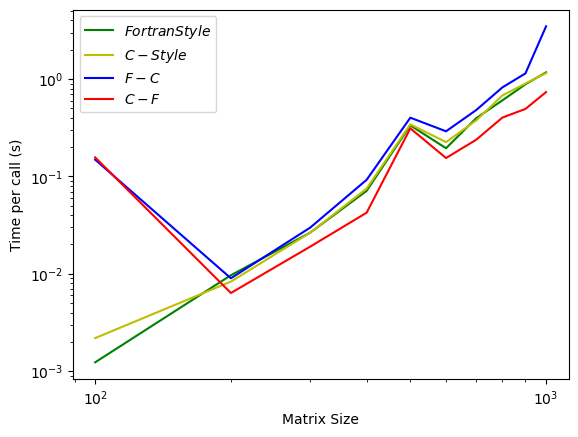

In [ ]:
import matplotlib.pylab as plt

plt.plot(matrix_size, Fortran_times, "g-")
plt.plot(matrix_size, Cstyle_times, "y-")
plt.plot(matrix_size, FandC_times, "b-")
plt.plot(matrix_size, CandF_times, "r-")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Matrix Size")
plt.ylabel("Time per call (s)")
plt.legend(["$Fortran Style$", "$C-Style$", "$F-C$", "$C-F$"])

# Second Part Answer

## Fortran style appears to be slightly faster than C-style in most of the cases, this is because fortran style is a column based ordering style. Thus it has better memory access. 